In [55]:
import joblib
import os
from matplotlib import pyplot as plt
import cv2

model = joblib.load('brain_tumor_KMeans_model.sav')
tumorLabel = 5

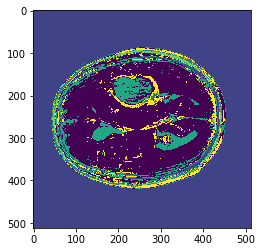

In [59]:
imagePath='test_images/0 (239).jpg'

img_original=cv2.imread(imagePath)
img=cv2.imread(imagePath,0)
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels = model.predict(imgFlatten)
Labels2D=labels.reshape(height,width)
mask=(Labels2D==tumorLabel)
plt.imshow(Labels2D)

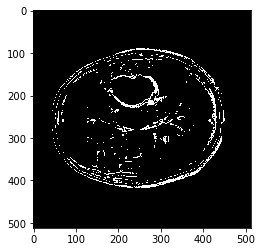

In [60]:
plt.imshow(mask,cmap='gray')

In [61]:
import numpy as np
tumorExtracted = np.bitwise_and(mask,img)
contours,hiearachy= cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("no of contours",len(contours))
#cv2.drawContours(img_orginal,contours,1502,(0,255,255),2)
for index,cnt in enumerate(contours):
    
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>1000):
        
        
        cv2.drawContours(img_original,[cnt], -1, (0,255,255), 2)
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
cv2.imshow('LIVE',img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

no of contours 1273
